# I. 군집화 개요

## 1-1 번  
군집화을 하는 목적을 적고, 기존의 분류 알고리즘과 다른 차이점을 적어주세요

답안 : 군집화는 유사성이 높은 데이터들은 같은 그룹으로 묶고, 다른 데이터들은 멀리 떨어뜨리고자 하는 목적을 가지고 있다. 기존의 분류 알고리즘들은 Lable값이 있는 지도학습모델 이지만 군집화의 경우 Lable값이 없는 비지도 학습이라는 점에서 가장 큰 차이를 보인다.

## 1-2 번  
군집화 모델을 평가하는 지표가 무엇인지 적고, 해당 지표가 무엇을 나타내는지 적어주세요

답안 : 실루엣 계수 (Silhouete Coefficient) , 실루엣 계수는 군집화가 얼마나 잘 됐는지를 나타내는 지표로서, -1부터 1사이의 값을 가진다. 군집내의 데이터포인트들이 서로 가까울수록, 타 군집 내부 데이터포인트와의 거리가 서로 멀 수록 1에 가까워진다.

## 1-3 번  
군집화 수행 결과와 실루엣 계수가 다음와 같이 나타났을 때, 이때 군집화는 적절하게 이루어진 것인지, 아니라면 왜 아닌지까지 설명해주세요!

 ![title](cluster.png)

### 실루엣 계수 : 0.7

답안 : 적절하게 이루어지지 않았다. 실루엣 계수가 0.7로 꽤 높은 수치를 기록하였으나, 시각화를 통해 확인한 결과 군집화가 매우 잘 된 하나의 군집에 의해 평균이 높아진 경우라고 볼 수 있다. 파란색 군집을 제외한 나머지 군집들은 서로 겹쳐진 상태로, 이들의 실루엣 계수는 음수를 기록하고 있을 것이나, 파란색 군집의 실루엣 계수가 매우 높게 나와 실루엣 계수가 0.7로 높게 나온 것으로 보인다. 해결 방안으로는 군집의 개수를 줄이는 것이 있을 수 있다.

## 1-4 번  
군집화는 어떤 분야에서 유용하게 사용되는지 최소 3가지 적어주세요!   
(구체적으로! ex : 경제분야 - 미래의 이자율을 예측하는데에 사용된다.)

답안  
       고객 세분화 - 고객들의 유형을 분류하여, 고객의 유형에 맞는 세부전략을 세울 수 있다.  
       이미지 분류 - 이미지 내부의 객체들을 탐지하여, 객체들을 분리, 분류시킬 수 있다.  
       이상 검출 - 특정 군집들에서 벗어난 이상치를 탐지하는 데에 용이하게 쓰일 수 있다.

# II. 클러스터링

## 문제 1. 실습문제  
sklean에서 제공하는 load_wine dataset 활용

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
#wine data 불러오기
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
wine_df['target'] = wine['target']

In [3]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
wine_df.shape

(178, 14)

### 문제 1-1. Code 작성하고, wine 데이터 특징 파악

In [5]:
# 결측치 확인

wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [6]:
# target 분포 확인

wine_df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

## 문제 2. K-means 클러스터링 문제

### 문제2-1. PCA를 통해서 wine의 feature(13개)를 2차원으로 줄이시오. (차원 축소)
입력되지 않은 code를 채워주세요.

In [7]:
from sklearn.decomposition import PCA

X = wine_df.iloc[:,:-1]
y = wine_df.iloc[:,-1]

# feature를 2차원으로 차원 축소
pca = PCA(n_components=2)
pca_tr = pca.fit_transform(X)

df = pd.DataFrame()
df['pca_x'] = pca_tr[:, 0] 
df['pca_y'] = pca_tr[:, 1]
df

,pca_x,pca_y
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
...,...,...
173,-6.980211,-4.541137
174,3.131605,2.335191
175,88.458074,18.776285
176,93.456242,18.670819


### 문제 2-2. 다음은 k-means 클러스터링에서 적합한 k를 찾기 위해 inertia값을 시각화하는 함수이다.
다음 함수 코드에 비워진 부분을 채우고, 물음에 답하시오.

In [8]:
# k 결정을 위한 k값에 따른 inertia값을 시각화하는 함수

def draw_inertia(data):
    inertia = []
    
    for n in range(1 , 11):
        kmeans = KMeans(n_clusters = n, random_state= 0,
                       init='k-means++', n_init = 15 ,
                     max_iter=300)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    plt.figure(1 , figsize = (15 ,6))
    plt.plot(np.arange(1 , 11) , inertia , 'o')
    plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.show()

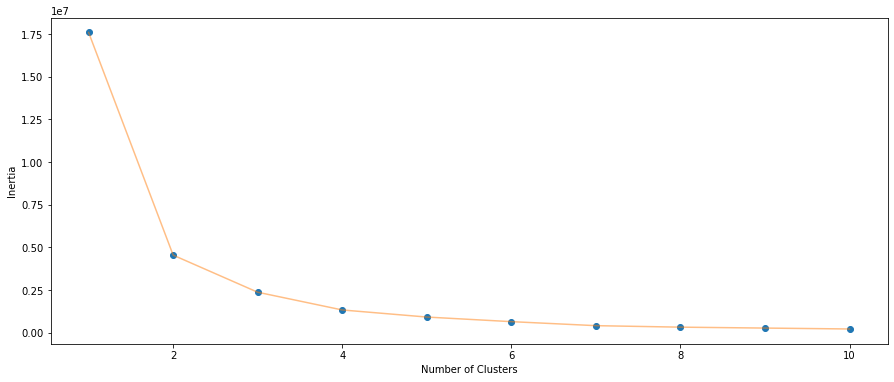

In [9]:
draw_inertia(X)

#### 위 시각화 결과를 고려했을 때, k를 얼마로 설정하는 것이 좋을까요?

3

### 문제 2-3. 위에서 결정한 k를 바탕으로 K-means 클러스터링을 시도하고, 이를 시각화하시오.

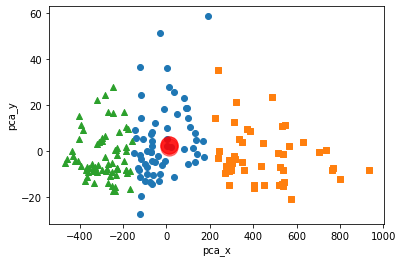

In [10]:
kmeans = KMeans(n_clusters = 3 ,init='k-means++', n_init = 15 ,max_iter=300, 
                 random_state=0 )
kmeans.fit(X)
labels = kmeans.fit_predict(X)
df['km_labels'] = labels

centroids = kmeans.cluster_centers_
unique_labels = np.unique(labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    cluster = df[df['km_labels']==label]    
    plt.scatter(x='pca_x', y='pca_y', data=cluster, marker=markers[label])
    
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('pca_y')
plt.xlabel('pca_x')
plt.show()

### 문제 2-4. 다음은 k-means 클러스터링 결과를 평가하기 위해 실루엣 계수를 시각화한 코드이다.

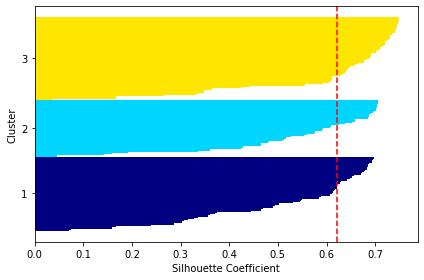

In [11]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# 실루엣 계수로 잘 군집화되었는지 확인
pred_plus = kmeans.fit_predict(X)
cluster_labels = np.unique(pred_plus)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, pred_plus, metric='euclidean')

y_ax_lower, y_ax_upper =0,0
yticks=[]

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[pred_plus==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
             height=1, edgecolor='none',
             color=color)
    yticks.append((y_ax_upper + y_ax_lower)/2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(c_silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()

#### 실루엣 계수 시각화 결과를 보았을 때, 클러스터링이 잘 진행된 것으로 보이나요? 그렇게 생각한 이유와 함께 적어주세요.

네. 실루엣 계수가 0.6을 넘었으며, 각 데이터가 어느 한 쪽의 클러스터의 집중 분포하는 것이 아니라, 거의 균등하게 분포하고 있기 때문이다.

## 문제 3. 계층적 군집화 문제

### 문제 3-1. 이번에는 wine_df에서 3개의 feature만 선택 해, 계층적 군집화 통해 분류해보려고 한다. 

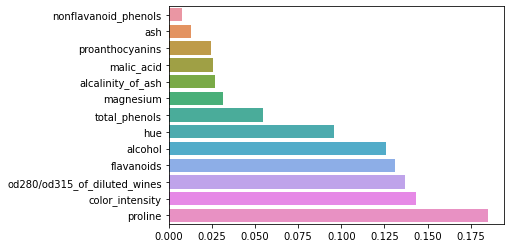

In [12]:
#3개의 feature 선택

from sklearn.ensemble import RandomForestClassifier

X_train = wine_df.iloc[:,:-1]
y_train = wine_df.iloc[:,-1]

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
sorted_i = rf.feature_importances_.argsort()
sns.barplot(x=rf.feature_importances_[sorted_i], y=wine_df.columns[sorted_i])
plt.show()

### 문제 3-2. 3개의 feture 선택해 Code 작성하시오

In [13]:
#Code 작성
#3개 feature 선택 

sel_data = wine_df[['proline', 'flavanoids','color_intensity']]
sel_data.head()

,proline,flavanoids,color_intensity
0,1065.0,3.06,5.64
1,1050.0,2.76,4.38
2,1185.0,3.24,5.68
3,1480.0,3.49,7.80
4,735.0,2.69,4.32


### 문제 3-3. 다음 코드를 작성하시오

In [14]:
#Code작성
#StandScaler()를 이용해 sel_data를 feture scaling 

scaler = StandardScaler()
scaled_X = scaler.fit_transform(sel_data)
print(scaled_X)

[[ 1.01300893e+00  1.03481896e+00  2.51716850e-01]
 [ 9.65241521e-01  7.33628941e-01 -2.93321329e-01]
 [ 1.39514818e+00  1.21553297e+00  2.69019649e-01]
 [ 2.33457383e+00  1.46652465e+00  1.18606801e+00]
 [-3.78740070e-02  6.63351271e-01 -3.19275528e-01]
 [ 2.23903902e+00  1.36612798e+00  7.31869531e-01]
 [ 1.72952002e+00  4.92676928e-01  8.30145565e-02]
 [ 1.74544249e+00  4.82637261e-01 -3.49944013e-03]
 [ 9.49319052e-01  9.54501620e-01  6.13860573e-02]
 [ 9.49319052e-01  1.12517596e+00  9.35177423e-01]
 [ 2.43010864e+00  1.29585031e+00  2.99299548e-01]
 [ 1.69767508e+00  4.02319923e-01 -2.51279393e-02]
 [ 1.82505483e+00  7.33628941e-01  2.34414051e-01]
 [ 1.28369089e+00  1.66731799e+00  1.47900054e-01]
 [ 2.54793491e+00  1.61711966e+00  1.05629702e+00]
 [ 1.79320989e+00  8.84223950e-01  9.69783022e-01]
 [ 1.69767508e+00  1.11513630e+00  4.93956040e-01]
 [ 1.22000102e+00  1.37616764e+00  6.66984033e-01]
 [ 2.97147258e+00  1.90827001e+00  1.57538100e+00]
 [ 3.12420304e-01  1.00469996e+

#### 계층적 군집화에는 다양한 likage method 존재한다. 어떤 method가 좋을지 확인해보자
#### (ward, average, single, complete)

In [15]:
from sklearn.metrics import adjusted_rand_score
# adjusted_rand_score은 예측 및 실제 클러스터링에서 동일하거나 다른 클러스터에 
# 할당된 쌍을 계산하여 두 클러스터링 간의 유사성을 계산합니다. 

clustering_ari = []

linkage_settings = ['ward', 'average', 'single', 'complete']
for method in linkage_settings:
    agg = AgglomerativeClustering(n_clusters=3, linkage=method)
    agg.fit(scaled_X)
    
    assignments_scaled_X = agg.labels_
    clustering_ari.append(adjusted_rand_score(y_train, assignments_scaled_X))

In [16]:
d = {'likage':linkage_settings, 'score': clustering_ari}
pd.DataFrame(d)

,likage,score
0,ward,0.661564
1,average,0.186220
2,single,-0.001686
3,complete,0.361885


### 문제 3-4. method를 선택해 clustering 하고 Dendrogram으로 나타내보자

In [17]:
df_X = pd.DataFrame(scaled_X, columns=sel_data.columns)
scaled_data = pd.concat([df_X, wine_df['target']], axis = 1)
scaled_data.head()

,proline,flavanoids,color_intensity,target
0,1.013009,1.034819,0.251717,0
1,0.965242,0.733629,-0.293321,0
2,1.395148,1.215533,0.269020,0
3,2.334574,1.466525,1.186068,0
4,-0.037874,0.663351,-0.319276,0


In [18]:
#Code 작성
#제일 높은 score을 가진 method 선택 , metric='euclidean'

clusters = linkage(scaled_data, method='ward', metric='euclidean')
clusters.shape

(177, 4)

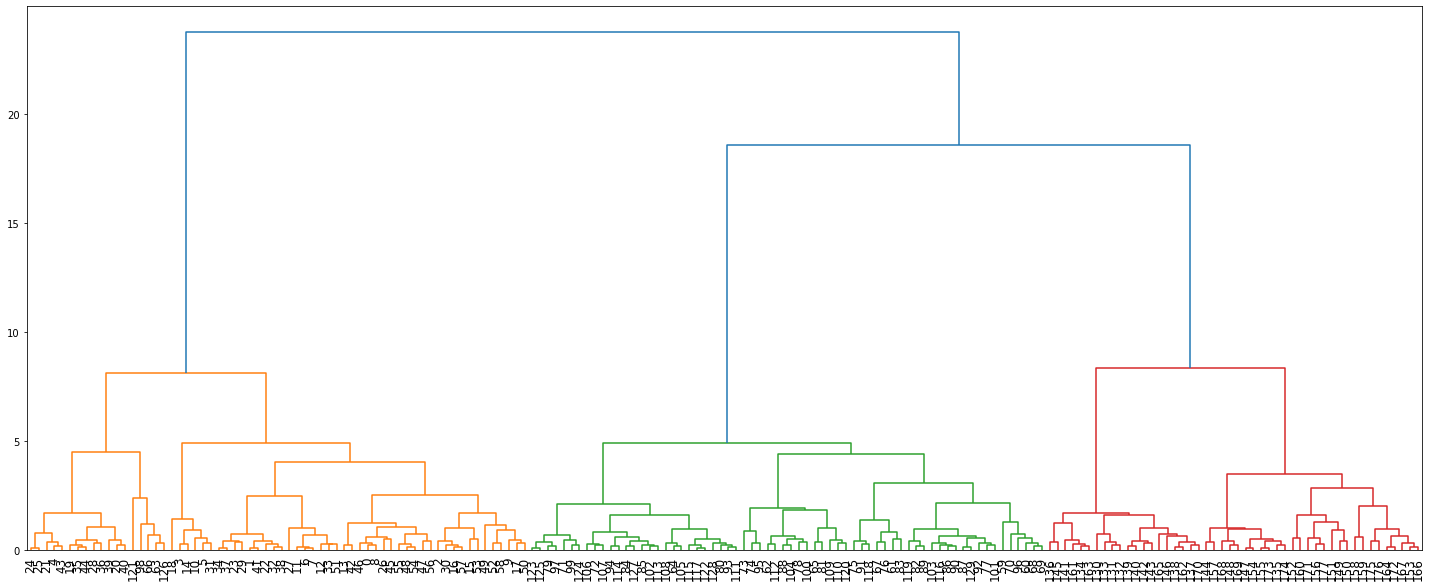

In [19]:
#Code 작성 
#Dendrogram으로 나타내기 

plt.figure(figsize=(25,10))
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12)
plt.show()

#### 클러스터링 결과를 확인해보자

In [20]:
from scipy.cluster.hierarchy import fcluster

cut_tree = fcluster(clusters, t=15, criterion='distance')
cut_tree
labels = scaled_data['target']

df = pd.DataFrame({'pred':cut_tree, 'labels':labels})
con_mat = pd.crosstab(df['pred'], df['labels'])
con_mat

labels,0,1,2
pred,,,
1,59,5,0
2,0,66,0
3,0,0,48


### 문제 3-5. 위의 코드를 통해 나온 결과를 서술하시오. (어떻게 나왔는지 간단하게 써주시면 됩니다.)

label 0인 데이터와 label 2인 데이터는 각각 59개 48개로 잘 분류 되었고, label 1인 데이터는 66개는 정확하게 분류되고 5개는 label이 0인 데이터로 분류 되었다. 

#### 시각화를 통해 클러스터링 결과를 확인해보자 

Text(0.5, 0, '3rd feature')

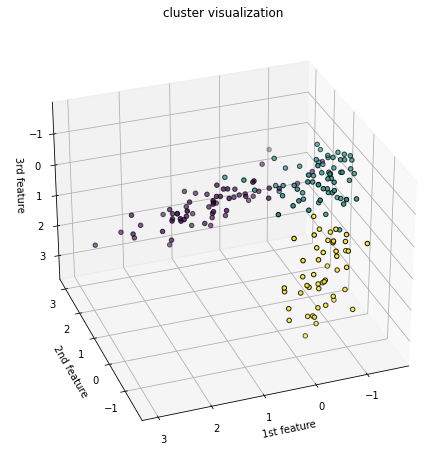

In [21]:
scaled_data['cluster'] = cut_tree

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(scaled_data.iloc[:,0],
          scaled_data.iloc[:,1],
          scaled_data.iloc[:,2],
          c = scaled_data['cluster'],
          edgecolor='k')

ax.set_title('cluster visualization')
ax.set_xlabel('1st feature')
ax.set_ylabel('2nd feature')
ax.set_zlabel('3rd feature')

### 문제 3-6. 계층적 군집화의 단점을 시간복잡도 측면에서 설명하시오.

클러스터링을 진행할 집합의 원소의 개수를 n이라고 한다면, 
클러스터를 합칠 때 마다 두 클러스터 사이의 거리를 모두 계산하기 때문에 O(n^2)의 시간이 소요된다. 
그리고 클러스터를 합치는 횟수가 n-1번이기 때문에 시간복잡도는 O(n^3)이 된다. 
이는 비교적 매우 오래걸리는 비효율적인 방법이다. n의 크기가 커지면 속도가 매우 느려져 사용하기 힘든 기법이다. 


### 문제 4. K-means, 계층적 군집화 외의 다른 클러스터링 방법을 1가지 이상 서술하고 차이점을 설명하시오. 

(1) K-means++ 알고리즘:
K평균 알고리즘의 단점을 개선한 모델, K개 군집 중심을 설정하여 이미 n개의 초기 군집 중심을 선택했다고 가정한다면,  n+1번째 군집 중심 선택할 때 현재 n개 군집 중심에서 거리가 먼 샘플이 선택될 확률을 높게 만든다. 

(2) DBSCAN:
밀도 기반 군집화이고, 간단하고 직관적인 알고리즘으로 되어 있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다. 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다. 

그 외에도 Gaussian Mixture Models (GMM)을 사용한 Expectation-Maximization (EM) 클러스터링, k-medians, k-shift 등 많음